<a href="https://colab.research.google.com/github/marclamberts/football-analysis/blob/main/g%2B_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Load the match event CSV
file_path = '/content/drive/MyDrive/Recruitment/Brøndby 1-1 Nordsjælland.csv'
df = pd.read_csv(file_path)


Mounted at /content/drive


In [ ]:
# Filter for successful passes
successful_passes = df[(df['typeId'] == 1) & (df['outcome'] == 1)]

# Assign g+ value
successful_passes['g_plus'] = 0.01

# Group by player (assuming 'id' is the player/event identifier)
player_gplus = successful_passes.groupby('playerName')['g_plus'].sum().reset_index()
player_gplus.columns = ['Player', 'g+ from successful passes']

# Sort by g+
player_gplus = player_gplus.sort_values(by='g+ from successful passes', ascending=False)
player_gplus.reset_index(drop=True, inplace=True)

# Display top results
player_gplus.head(10)


<ipython-input-2-b1d3351de027>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful_passes['g_plus'] = 0.01


,Player,g+ from successful passes
0,L. Hey,1.02
1,L. Høgsberg,0.90
2,J. Tverskov,0.87
3,D. Svensson,0.80
4,M. Dorgeles,0.79
5,P. Ankersen,0.74
6,M. Brink,0.64
7,B. Nygren,0.44
8,F. Alves,0.43
9,J. Vanlerberghe,0.43


In [ ]:
# Convert g+ to WAR
player_gplus['WAR (from passes only)'] = player_gplus['g+ from successful passes'] / 2.7

# View top players by WAR
player_gplus.head(10)


,Player,g+ from successful passes,WAR (from passes only)
0,L. Hey,1.02,0.377778
1,L. Høgsberg,0.90,0.333333
2,J. Tverskov,0.87,0.322222
3,D. Svensson,0.80,0.296296
4,M. Dorgeles,0.79,0.292593
5,P. Ankersen,0.74,0.274074
6,M. Brink,0.64,0.237037
7,B. Nygren,0.44,0.162963
8,F. Alves,0.43,0.159259
9,J. Vanlerberghe,0.43,0.159259


            Player  g+ from successful passes
0           L. Hey                       1.02
1      L. Høgsberg                       0.90
2      J. Tverskov                       0.87
3      D. Svensson                       0.80
4      M. Dorgeles                       0.79
5      P. Ankersen                       0.74
6         M. Brink                       0.64
7        B. Nygren                       0.44
8         F. Alves                       0.43
9  J. Vanlerberghe                       0.43


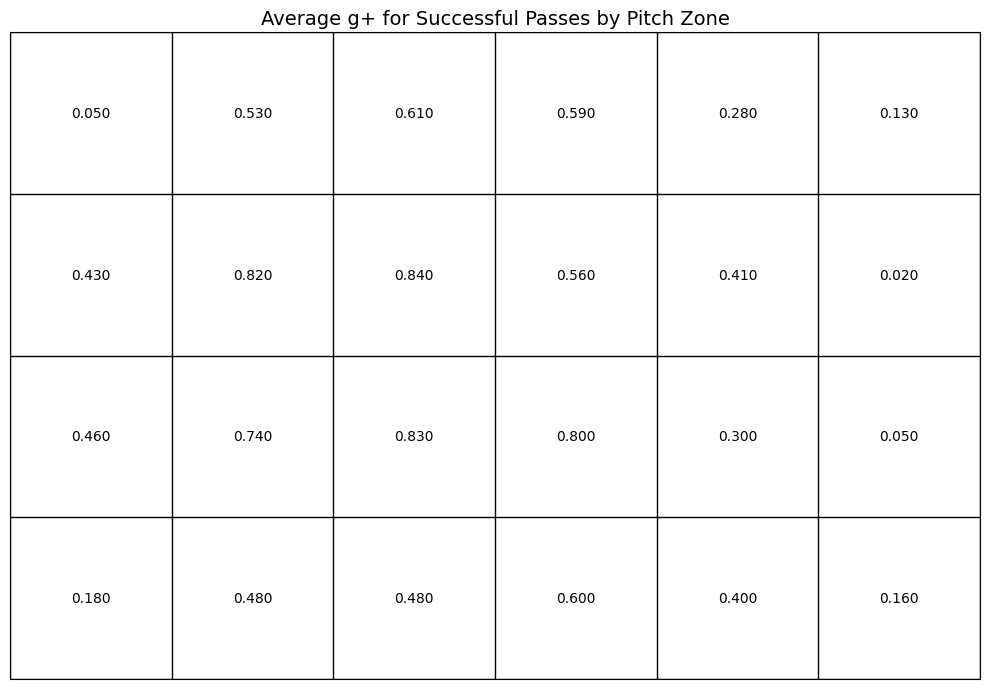

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# ------------------------------
# PART 1: g+ per Player
# ------------------------------

# Filter for successful passes
successful_passes = df[(df['typeId'] == 1) & (df['outcome'] == 1)].copy()

# Assign g+ value
successful_passes['g_plus'] = 0.01

# Group by player (assuming 'playerName' exists)
player_gplus = successful_passes.groupby('playerName')['g_plus'].sum().reset_index()
player_gplus.columns = ['Player', 'g+ from successful passes']

# Sort and display
player_gplus = player_gplus.sort_values(by='g+ from successful passes', ascending=False).reset_index(drop=True)
print(player_gplus.head(10))

# ------------------------------
# PART 2: g+ per Pitch Zone (Heatmap)
# ------------------------------

# Ensure x/y are numeric
successful_passes['x'] = pd.to_numeric(successful_passes['x'], errors='coerce')
successful_passes['y'] = pd.to_numeric(successful_passes['y'], errors='coerce')
successful_passes = successful_passes.dropna(subset=['x', 'y'])

# Bin settings
x_bins = 6
y_bins = 4
successful_passes['x_bin'] = pd.cut(successful_passes['x'], bins=x_bins, labels=False)
successful_passes['y_bin'] = pd.cut(successful_passes['y'], bins=y_bins, labels=False)

# Aggregate average g+ by bin
zone_gplus = successful_passes.groupby(['x_bin', 'y_bin'])['g_plus'].sum().unstack()
#zone_war = successful_passes.groupby(['x_bin', 'y_bin'])['g_plus'].sum().unstack() / 2.7

# ------------------------------
# Plotting
# ------------------------------

fig, ax = plt.subplots(figsize=(10, 7))

# Draw pitch lines
for x in range(x_bins + 1):
    ax.axvline(x, color='black', lw=1)
for y in range(y_bins + 1):
    ax.axhline(y, color='black', lw=1)

# Add g+ values in each bin
for i in range(x_bins):
    for j in range(y_bins):
        value = zone_gplus.loc[i, j] if (i in zone_gplus.index and j in zone_gplus.columns) else 0
        ax.text(i + 0.5, j + 0.5, f"{value:.3f}", va='center', ha='center', fontsize=10)

# Style
ax.set_xlim(0, x_bins)
ax.set_ylim(0, y_bins)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Average g+ for Successful Passes by Pitch Zone", fontsize=14)
ax.set_aspect('equal')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
import pandas as pd

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Define output path in your Drive (adjust the folder if needed)
output_path = "/content/drive/MyDrive/Recruitment/gplus_war_pitch_zones.xlsx"

# 3. Flatten and prepare data
zone_gplus_flat = zone_gplus.stack().reset_index()
zone_gplus_flat.columns = ['x_bin', 'y_bin', 'g_plus']

zone_war_flat = zone_war.stack().reset_index()
zone_war_flat.columns = ['x_bin', 'y_bin', 'WAR']

zone_export = pd.merge(zone_gplus_flat, zone_war_flat, on=['x_bin', 'y_bin'])

# 4. Save to Excel in Drive
zone_export.to_excel(output_path, index=False)

print(f"✅ File saved to: {output_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ File saved to: /content/drive/MyDrive/Recruitment/gplus_war_pitch_zones.xlsx


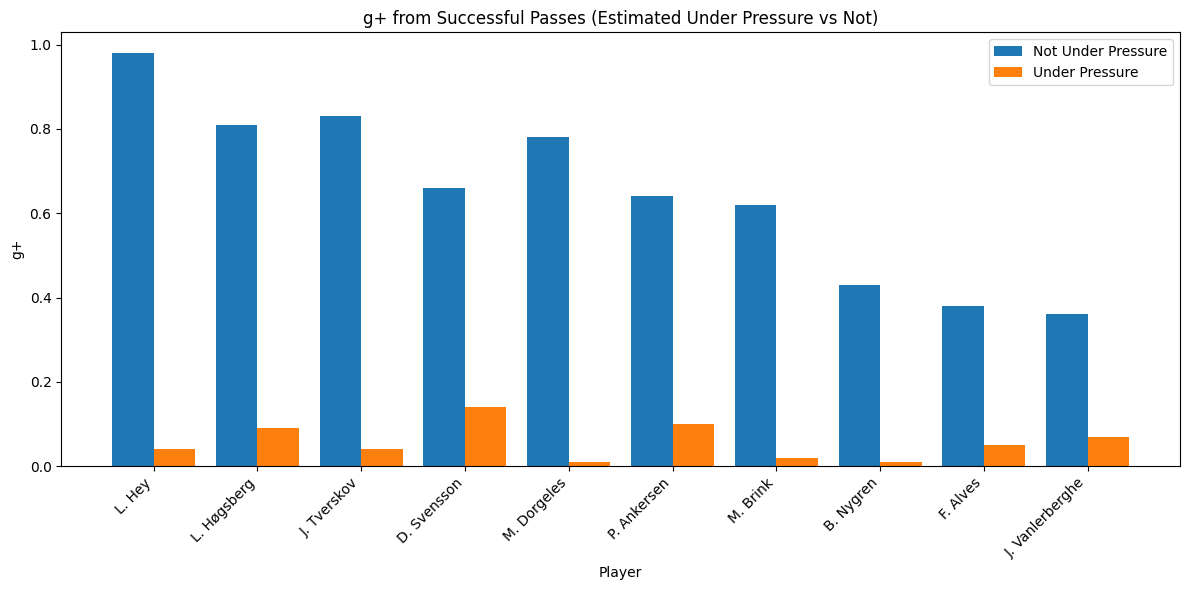

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# ---------------------------------------
# STEP 1: Filter successful passes
# ---------------------------------------
passes = df[(df['typeId'] == 1) & (df['outcome'] == 1)].copy()
passes['g_plus'] = 0.01

# Ensure x/y are numeric
passes['x'] = pd.to_numeric(passes['x'], errors='coerce')
passes['y'] = pd.to_numeric(passes['y'], errors='coerce')
passes = passes.dropna(subset=['x', 'y'])

# ---------------------------------------
# STEP 2: Estimate pressure condition
# ---------------------------------------
# Pressure rule: defensive third (x < 33.3) AND near touchlines (y < 20 or y > 80)
passes['under_pressure'] = (passes['x'] < 33.3) & ((passes['y'] < 20) | (passes['y'] > 80))

# ---------------------------------------
# STEP 3: Aggregate g+ under and not under pressure
# ---------------------------------------
pressure_gplus = passes.groupby(['playerName', 'under_pressure'])['g_plus'].sum().unstack(fill_value=0)
pressure_gplus.columns = ['g+ not under pressure', 'g+ under pressure']
pressure_gplus['Total g+'] = pressure_gplus.sum(axis=1)
pressure_gplus['% under pressure'] = (pressure_gplus['g+ under pressure'] / pressure_gplus['Total g+']) * 100
pressure_gplus = pressure_gplus.reset_index()

# ---------------------------------------
# STEP 4: Plot bar chart for top 10 players
# ---------------------------------------
top10 = pressure_gplus.sort_values(by='Total g+', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4
index = np.arange(len(top10))

bars1 = ax.bar(index, top10['g+ not under pressure'], bar_width, label='Not Under Pressure')
bars2 = ax.bar(index + bar_width, top10['g+ under pressure'], bar_width, label='Under Pressure')

ax.set_xlabel('Player')
ax.set_ylabel('g+')
ax.set_title('g+ from Successful Passes (Estimated Under Pressure vs Not)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top10['playerName'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


In [13]:
# STEP 1: Filter successful passes
passes = df[(df['typeId'] == 1) & (df['outcome'] == 1)].copy()
passes['g_plus'] = 0.01

# Clean coordinates
passes['x'] = pd.to_numeric(passes['x'], errors='coerce')
passes['y'] = pd.to_numeric(passes['y'], errors='coerce')
passes = passes.dropna(subset=['x', 'y'])

# STEP 2: Estimate under pressure
passes['under_pressure'] = (passes['x'] < 33.3) & ((passes['y'] < 20) | (passes['y'] > 80))

# STEP 3: Aggregate g+ and WAR
gplus = passes.groupby(['playerName', 'contestantId', 'under_pressure'])['g_plus'].sum().unstack(fill_value=0).reset_index()
gplus.columns = ['Player', 'Team ID', 'g+ not under pressure', 'g+ under pressure']
gplus['Total g+'] = gplus['g+ not under pressure'] + gplus['g+ under pressure']
gplus['WAR'] = gplus['Total g+'] / 2.7
gplus['WAR under pressure'] = gplus['g+ under pressure'] / 2.7

# STEP 4: Save to Google Drive
output_path = '/content/drive/MyDrive/Recruitment/player_gplus_war_pressure.xlsx'
gplus.to_excel(output_path, index=False)

print(f"✅ File saved to: {output_path}")

✅ File saved to: /content/drive/MyDrive/Recruitment/player_gplus_war_pressure.xlsx


In [15]:
# Sample g+ values (just for demo; customize with your real model)
gplus_lookup = {
    1: 0.01,  # Pass
    15: 0.10,  # Shot on target
    16: 0.25   # Goal
}

# Assign g+ values to relevant actions
df['g_plus'] = df['typeId'].map(gplus_lookup).fillna(0)

# Sort by time (if needed, based on event ordering)
df = df.sort_values(by=['eventId'])  # adjust if you have timestamps

# Create possession sequence logic
df['new_possession'] = (
    (df['contestantId'] != df['contestantId'].shift(1)) |
    (df['typeId'].shift(1).isin([15, 16]))  # end chain on shot/goal
).astype(int)

# Create possession ID
df['possessionId'] = df['new_possession'].cumsum()

# Sum g+ per possession and assign to players in that chain
chain_gplus = df.groupby('possessionId')['g_plus'].sum().reset_index()
df = df.merge(chain_gplus, on='possessionId', suffixes=('', '_chain'))

# Optional: chain size (how many players/actions)
chain_participation = df.groupby('possessionId')['playerName'].nunique().reset_index(name='players_in_chain')
df = df.merge(chain_participation, on='possessionId')

# Attribution: total g+ chain contribution per player
player_chain_gplus = df.groupby('playerName')['g_plus_chain'].sum().reset_index()
player_chain_gplus = player_chain_gplus.sort_values(by='g_plus_chain', ascending=False)

# Show top players by g+ chain involvement
print(player_chain_gplus.head(10))

      playerName  g_plus_chain
11        L. Hey         44.25
12   L. Høgsberg         42.09
8    J. Tverskov         41.36
4    D. Svensson         41.16
23   P. Ankersen         36.03
30  Z. Sertdemir         30.65
16   M. Dorgeles         30.63
1      B. Nygren         21.25
3    C. Yirenkyi         20.64
0      A. Hansen         15.72
